# How much gender disparity is present in the video games community?

## Games data analysis

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [28]:
games = pd.read_csv('./data/games.grivg.csv') #reading the data

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game_Id               64 non-null     object 
 1   Title                 64 non-null     object 
 2   Release               64 non-null     object 
 3   Series                27 non-null     object 
 4   Genre                 64 non-null     object 
 5   Sub-genre             64 non-null     object 
 6   Developer             64 non-null     object 
 7   Publisher             64 non-null     object 
 8   Country               64 non-null     object 
 9   Platform              64 non-null     object 
 10  PEGI                  64 non-null     int64  
 11  Customizable_main     64 non-null     object 
 12  Protagonist           64 non-null     int64  
 13  Protagonist_Non_Male  64 non-null     int64  
 14  Relevant_males        64 non-null     int64  
 15  Relevant_no_males     64 

In [30]:
games.columns = games.columns.str.lower().str.replace(" ","_")

In [31]:
games[games.duplicated() == True] #creating a boolean mask to check for any duplicates

,game_id,title,release,series,genre,sub-genre,developer,publisher,country,platform,...,director,total_team,female_team,team_percentage,metacritic_,destructoid,ign,gamespot,avg_reviews,unnamed:_27


In [32]:
games.isnull().sum() #looking for null values

game_id                  0
title                    0
release                  0
series                  37
genre                    0
sub-genre                0
developer                0
publisher                0
country                  0
platform                 0
pegi                     0
customizable_main        0
protagonist              0
protagonist_non_male     0
relevant_males           0
relevant_no_males        0
percentage_non_male      0
criteria                 0
director                 0
total_team               0
female_team              0
team_percentage          0
metacritic_              0
destructoid              7
ign                      2
gamespot                 2
avg_reviews              0
unnamed:_27             64
dtype: int64

In [33]:
games.drop('series', axis='columns', inplace=True) #removing series column since it has a lot of null values
games.drop('unnamed:_27', axis='columns', inplace=True)
games.drop('team_percentage', axis='columns', inplace=True) #removing this because they are string values and we need ints.

In [34]:
games = games.dropna() #removing rows with null values

In [35]:
games['release'] = pd.to_datetime(games['release'],format = '%b-%y') #converting date to a datetime data

In [36]:
games.sort_values( by = 'release', inplace =True)

In [37]:
games['male_team']=(games['total_team'])-(games['female_team'])

In [38]:
games["female_team_percentage"] = ((games["female_team"])/(games['total_team'])*100).round() 
#creating a new column because the old percentage was a string.

In [39]:
games["male_team_percentage"] = ((games["male_team"])/(games['total_team'])*100).round()

In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 21 to 24
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 56 non-null     object        
 1   title                   56 non-null     object        
 2   release                 56 non-null     datetime64[ns]
 3   genre                   56 non-null     object        
 4   sub-genre               56 non-null     object        
 5   developer               56 non-null     object        
 6   publisher               56 non-null     object        
 7   country                 56 non-null     object        
 8   platform                56 non-null     object        
 9   pegi                    56 non-null     int64         
 10  customizable_main       56 non-null     object        
 11  protagonist             56 non-null     int64         
 12  protagonist_non_male    56 non-null     int64         
 

In [41]:
games.to_csv('games_clean.csv', index=None)

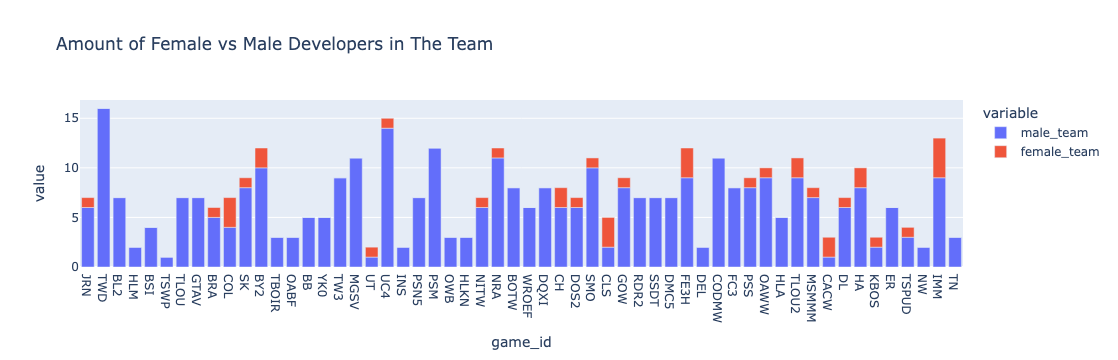

In [42]:
fig_male_female_team=px.bar(games, x = "game_id", y= ["male_team","female_team"], title="Amount of Female vs Male Developers in The Team")
fig_male_female_team

In [43]:
games['protagonist_male']=(games['protagonist'])-(games['protagonist_non_male'])

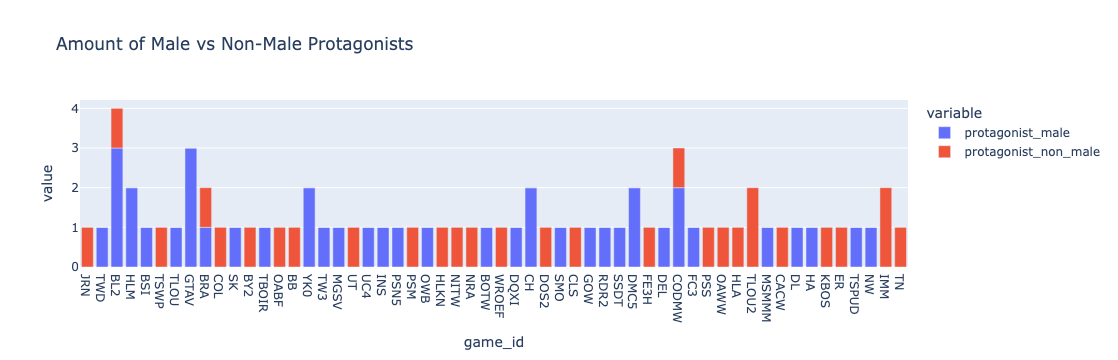

In [44]:
fig_protagonist=px.bar(games, x = "game_id", y= ["protagonist_male","protagonist_non_male"], title="Amount of Male vs Non-Male Protagonists")
fig_protagonist

In [45]:
games['female_team_percentage_per_date'] = games.groupby('release')['female_team_percentage'].transform('mean').round()

In [46]:
games['male_team_percentage_per_date'] = games.groupby('release')['male_team_percentage'].transform('mean').round()
games

,game_id,title,release,genre,sub-genre,developer,publisher,country,platform,pegi,...,destructoid,ign,gamespot,avg_reviews,male_team,female_team_percentage,male_team_percentage,protagonist_male,female_team_percentage_per_date,male_team_percentage_per_date
21,JRN,Journey,2012-03-01,Adventure,Adventure,Thatgamecompany,Sony Computer Entertainment,USA,PS3,12,...,9.0,9.0,9.5,9.2,6,14.0,86.0,0,14.0,86.0
10,TWD,The Walking Dead,2012-04-01,Adventure,Episodic adventure,Telltale Games,Telltale Games,USA,Multi,18,...,8.6,9.3,8.5,8.7,16,0.0,100.0,1,0.0,100.0
9,BL2,Borderlands 2,2012-09-01,Action,FPS,Gearbox Software,2K Games,USA,Multi,18,...,8.5,9.0,8.5,8.5,7,0.0,100.0,3,0.0,100.0
20,HLM,Hotline Miami,2012-10-01,Action,Top-down Shooter,Dennaton Games,Devolver Digital,SWE,Multi,18,...,9.0,8.8,8.5,8.7,2,0.0,100.0,2,0.0,100.0
19,BSI,BioShock Infinite,2013-03-01,Action,FPS,Irrational Games,2K Games,USA,Multi,18,...,10.0,9.5,9.0,9.5,4,0.0,100.0,1,0.0,100.0
56,TSWP,The Swapper,2013-05-01,Action,Puzzle-Platform,Facepalm Games,Facepalm Games,FIN,Computer,7,...,10.0,9.3,8.0,9.0,1,0.0,100.0,0,0.0,100.0
18,TLOU,The Last of Us,2013-06-01,Action-adventure,Action-adventure,Naughty Dog,Sony Computer Entertainment,USA,PS3,18,...,10.0,10.0,8.0,9.4,7,0.0,100.0,1,0.0,100.0
0,GTAV,Grand Theft Auto V,2013-11-01,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,18,...,9.0,10.0,9.0,9.4,7,0.0,100.0,3,0.0,100.0
54,BRA,Broken Age,2014-01-01,Adventure,Point-and-click adventure,Double Fine Productions,Double Fine Productions,USA,Computer,12,...,9.5,9.5,7.0,8.5,5,17.0,83.0,1,17.0,83.0
60,COL,Child of Light,2014-04-01,Action,Platform RPG,Ubisoft Montreal,Ubisoft,CAN,Multi,7,...,8.5,9.3,8.0,8.5,4,43.0,57.0,0,43.0,57.0


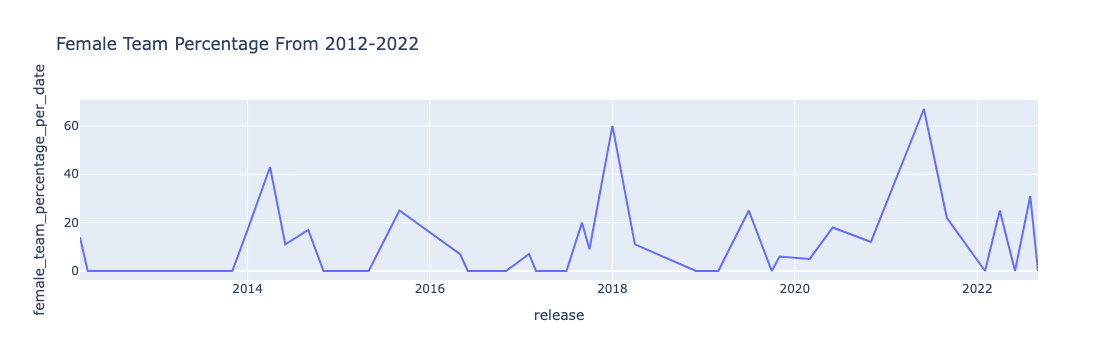

In [64]:
fig_line= px.line(games, x = games["release"], y = games["female_team_percentage_per_date"], title = "Female Team Percentage From 2012-2022")
fig_line

Text(0.5, 1.0, 'Percentage Distribution of Male and Female Directors')

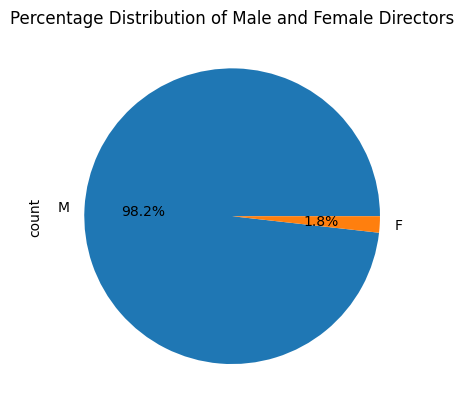

In [52]:
games["director"].value_counts(dropna=False).plot(kind="pie", autopct='%1.1f%%', labels=['M', 'F'])
plt.title('Percentage Distribution of Male and Female Directors')

In [53]:
action_games = games[games['genre'] == 'Action']
action_games

,game_id,title,release,genre,sub-genre,developer,publisher,country,platform,pegi,...,destructoid,ign,gamespot,avg_reviews,male_team,female_team_percentage,male_team_percentage,protagonist_male,female_team_percentage_per_date,male_team_percentage_per_date
9,BL2,Borderlands 2,2012-09-01,Action,FPS,Gearbox Software,2K Games,USA,Multi,18,...,8.5,9.0,8.5,8.5,7,0.0,100.0,3,0.0,100.0
20,HLM,Hotline Miami,2012-10-01,Action,Top-down Shooter,Dennaton Games,Devolver Digital,SWE,Multi,18,...,9.0,8.8,8.5,8.7,2,0.0,100.0,2,0.0,100.0
19,BSI,BioShock Infinite,2013-03-01,Action,FPS,Irrational Games,2K Games,USA,Multi,18,...,10.0,9.5,9.0,9.5,4,0.0,100.0,1,0.0,100.0
56,TSWP,The Swapper,2013-05-01,Action,Puzzle-Platform,Facepalm Games,Facepalm Games,FIN,Computer,7,...,10.0,9.3,8.0,9.0,1,0.0,100.0,0,0.0,100.0
60,COL,Child of Light,2014-04-01,Action,Platform RPG,Ubisoft Montreal,Ubisoft,CAN,Multi,7,...,8.5,9.3,8.0,8.5,4,43.0,57.0,0,43.0,57.0
16,SK,Shovel Knight: Shovel of Hope,2014-06-01,Action,Platform,Yacht Club Games,Yacht Club Games,USA,Multi,7,...,9.0,9.0,8.0,8.7,8,11.0,89.0,1,11.0,89.0
55,MGSV,Metal Gear Solid V: The Phantom Pain,2015-09-01,Action,Stealth,Kojima Productions,Konami,JPN,Multi,18,...,9.0,10.0,10.0,9.6,11,0.0,100.0,1,25.0,75.0
13,INS,Inside,2016-06-01,Action,Puzzle-Platform,Paydead,Playdead,DNK,Multi,18,...,9.5,10.0,8.0,9.2,2,0.0,100.0,1,0.0,100.0
28,CH,Cuphead,2017-09-01,Action,Rund and gun,Studio MDHR,Studio MDHR,CAN,Multi,7,...,9.5,8.8,8.5,8.9,6,25.0,75.0,2,20.0,80.0
49,CLS,Celeste,2018-01-01,Action,Platform,Maddy Makes Games,Maddy Makes Games,CAN,Multi,7,...,10.0,10.0,9.0,9.5,2,60.0,40.0,0,60.0,40.0


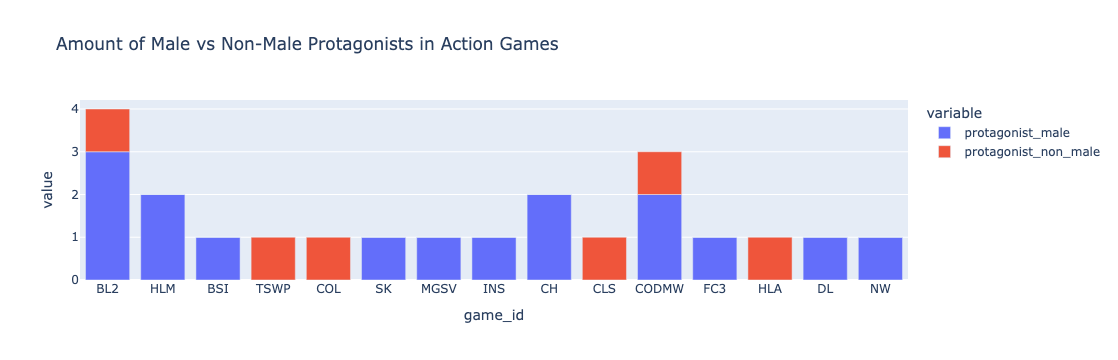

In [54]:
fig_protagonist_action=px.bar(action_games, x = "game_id", y= ["protagonist_male","protagonist_non_male"], title="Amount of Male vs Non-Male Protagonists in Action Games")
fig_protagonist_action

## Developers data analysis

In [55]:
developers = pd.read_csv('./data/video_game_developers_worldwide2014_2021.csv') #reading the data

In [56]:
developers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        18 non-null     int64  
 1   gender      18 non-null     object 
 2   percentage  18 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 564.0+ bytes


In [57]:
developers_women = developers[developers['gender'] == 'women']

In [58]:
developers_men = developers[developers['gender'] == 'men']

In [59]:
developers_non_binary = developers[developers['gender'] == 'non-binary']

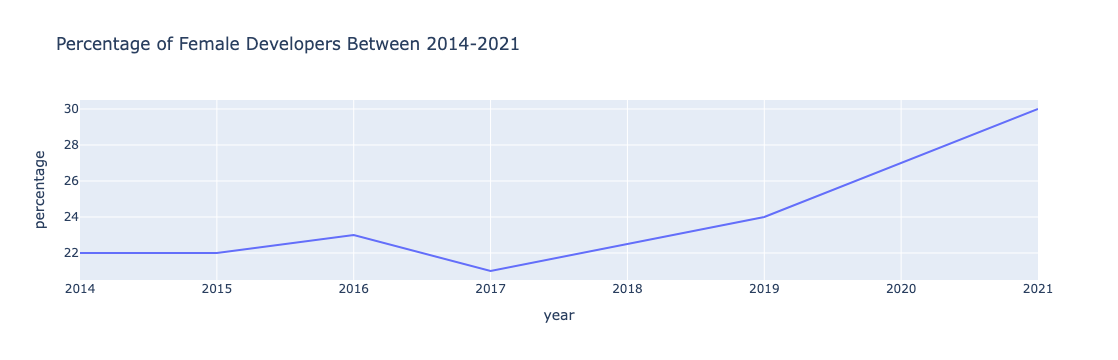

In [61]:
year_women = px.line(developers_women, x = developers_women["year"], y = developers_women["percentage"], title = 'Percentage of Female Developers Between 2014-2021')
year_women

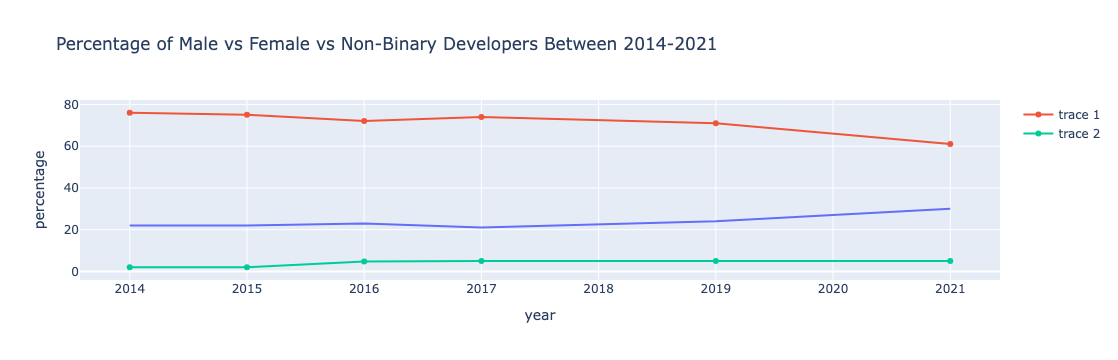

In [62]:
year_developers = px.line(developers_women, x = developers_women["year"], y = developers_women["percentage"], title = 'Percentage of Male vs Female vs Non-Binary Developers Between 2014-2021')
year_developers.add_scatter(x =developers_men['year'], y = developers_men['percentage'])
year_developers.add_scatter(x =developers_non_binary['year'], y = developers_non_binary['percentage'])
year_developers